<a href="https://colab.research.google.com/github/vipulSharma18/Push-Recovery-using-Deep-Q-Learning/blob/main/models/Prototype_DNN_on_Inverse_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
import tensorflow as tf

In [3]:
dataset = pd.read_hdf("/content/drive/MyDrive/Inverse Dynamics/InverseDynamicDataset.h5", key = 'dataset')

In [4]:
dataset.head()

,Mass1,Length1,Mass2,Length2,Theta1,Theta2,Velocity1,Velocity2,Acceleration1,Acceleration2,T1,T2
0,3.2,0.44,10.13,0.42,59.03,84.71,4.53,-2.24,2.36,-1.01,33.00,7.45
1,3.2,0.44,10.13,0.42,59.03,84.71,4.53,-2.24,2.36,1.70,38.77,12.29
2,3.2,0.44,10.13,0.42,59.03,84.71,4.53,-2.24,2.36,2.05,39.52,12.92
3,3.2,0.44,10.13,0.42,59.03,84.71,4.53,-2.24,2.36,1.10,37.49,11.22
4,3.2,0.44,10.13,0.42,59.03,84.71,4.53,-2.24,2.36,0.40,36.00,9.97


In [5]:
X_cols = list(dataset.columns)[:-2]

In [6]:
y_1_col = ['T1']
y_2_col = ['T2']

In [7]:
X = dataset[X_cols]
y_1 = dataset[y_1_col]
y_2 = dataset[y_2_col]

In [8]:
y_1.shape, y_2.shape, X.shape

((4000000, 1), (4000000, 1), (4000000, 10))

# Model For T1 calculation

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size = 0.2, random_state = 42)

In [10]:
model = Sequential()
model.add(Dense(16,activation='relu', input_shape = (10,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = 'mean_squared_error')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train,validation_split=0.2, epochs=60, batch_size = 200)

Epoch 1/60
12800/12800 [==============================] - 25s 2ms/step - loss: 505.7745 - mean_squared_error: 505.7745 - val_loss: 60.5108 - val_mean_squared_error: 60.5108
Epoch 2/60
12800/12800 [==============================] - 23s 2ms/step - loss: 50.9677 - mean_squared_error: 50.9677 - val_loss: 33.7894 - val_mean_squared_error: 33.7894
Epoch 3/60
12800/12800 [==============================] - 22s 2ms/step - loss: 31.1092 - mean_squared_error: 31.1092 - val_loss: 23.9173 - val_mean_squared_error: 23.9173
Epoch 4/60
12800/12800 [==============================] - 22s 2ms/step - loss: 22.6764 - mean_squared_error: 22.6764 - val_loss: 17.5801 - val_mean_squared_error: 17.5801
Epoch 5/60
12800/12800 [==============================] - 22s 2ms/step - loss: 16.8243 - mean_squared_error: 16.8243 - val_loss: 13.6347 - val_mean_squared_error: 13.6347
Epoch 6/60
12800/12800 [==============================] - 22s 2ms/step - loss: 13.4508 - mean_squared_error: 13.4508 - val_loss: 11.6466 - val_

In [13]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error T1')
  plt.legend()
  plt.grid(True)

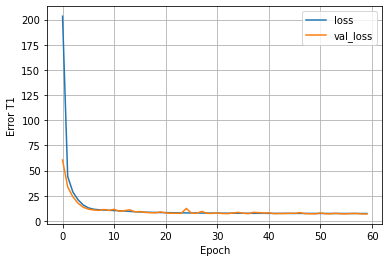

In [14]:
plot_loss(history)

In [15]:
test_result = model.evaluate(X_test, y_test)
print(test_result)

25000/25000 [==============================] - 37s 1ms/step - loss: 6.9164 - mean_squared_error: 6.9164
[6.916352272033691, 6.916352272033691]


In [16]:
model.save('T1Model')

INFO:tensorflow:Assets written to: T1Model/assets


In [ ]:
del X_train, X_test, y_train, y_test, model
gc.collect()

# Model for T2 Calculation

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size = 0.2, random_state = 42)

In [24]:
model = Sequential()
model.add(Dense(16,activation='relu', input_shape = (10,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'mean_squared_error', metrics = 'mean_squared_error')

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, y_train,validation_split=0.2, epochs=60, batch_size = 200)

Epoch 1/60
12800/12800 [==============================] - 23s 2ms/step - loss: 47.1678 - mean_squared_error: 47.1678 - val_loss: 4.7465 - val_mean_squared_error: 4.7465
Epoch 2/60
12800/12800 [==============================] - 23s 2ms/step - loss: 3.6767 - mean_squared_error: 3.6767 - val_loss: 2.7561 - val_mean_squared_error: 2.7561
Epoch 3/60
12800/12800 [==============================] - 22s 2ms/step - loss: 2.5043 - mean_squared_error: 2.5043 - val_loss: 2.0682 - val_mean_squared_error: 2.0682
Epoch 4/60
12800/12800 [==============================] - 22s 2ms/step - loss: 1.9715 - mean_squared_error: 1.9715 - val_loss: 1.3782 - val_mean_squared_error: 1.3782
Epoch 5/60
12800/12800 [==============================] - 22s 2ms/step - loss: 1.4031 - mean_squared_error: 1.4031 - val_loss: 1.0233 - val_mean_squared_error: 1.0233
Epoch 6/60
12800/12800 [==============================] - 22s 2ms/step - loss: 1.1934 - mean_squared_error: 1.1934 - val_loss: 1.0213 - val_mean_squared_error: 1.0

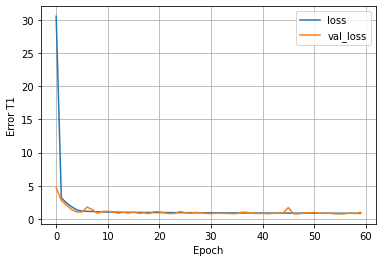

In [27]:
plot_loss(history)

In [28]:
test_result = model.evaluate(X_test, y_test)
print(test_result)

25000/25000 [==============================] - 37s 1ms/step - loss: 0.9685 - mean_squared_error: 0.9685
[0.9684787392616272, 0.9684787392616272]


In [29]:
model.save('T2Model')

INFO:tensorflow:Assets written to: T2Model/assets
